In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from instruments.utils import *

### TO DO
- [x] Test all the functions in utils.py
- [ ] If ok, set up an analysis file ready to use for quick tests (in fill_matrix un bool che se true restituisce gli array, così non sto a creare un nuovo file ogni volta per la gioia di Matteo e se necessario alla fine salvo tutto, file e plot)
- [ ] put here also the acquisition and set of frequency
- [ ] second derivative in test.ipynb
- [ ] unire i tre pxie in uno
- [ ] organizzare le cartelle in modo decente, con niente dopo instruments se no non posso chiamare i pacchetti

In [3]:
file_name = 'attenuation_26dB'
file = file_name + '.h5'
ref = 5.87045 
step = 0.0002

In [4]:
I, Q = get_hdf5(file)
print('%d frequencies considered, for each one %d points have been taken.' %(len(I), len(I[0])))

200 frequencies considered, for each one 1000 points have been taken.


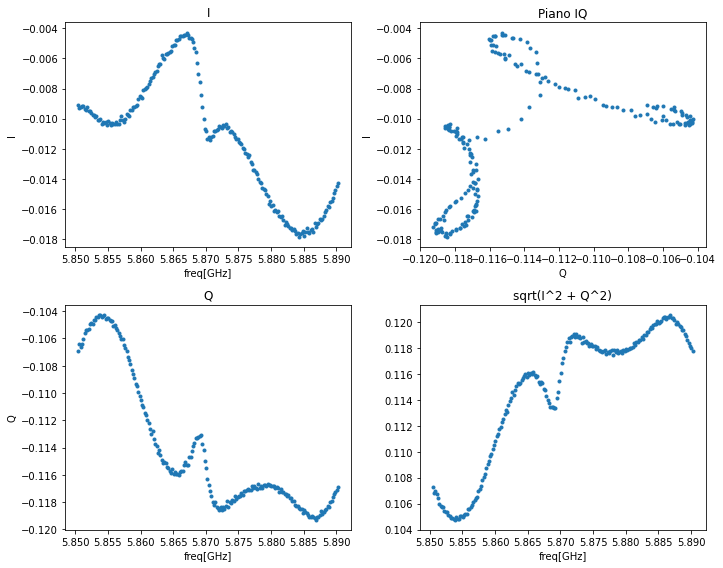

In [4]:
I_mean, Q_mean = get_mean(file)
big_plot_from_array(I_mean, Q_mean, ref, step)

In [8]:
x = []
for i in range(-int(len(Q_mean)/2), int(len(Q_mean)/2)): 
    x.append(ref + i*0.0002) 
#print(x)

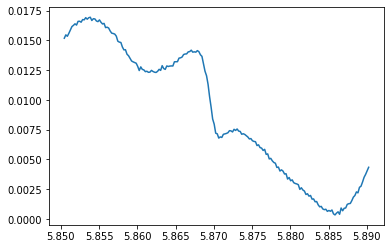

In [8]:
Q_new = np.array(Q_mean) - min(Q_mean) 
I_new = np.array(I_mean) - min(I_mean) 

plt.plot(x,(np.array(Q_new)**2+np.array(I_new)**2)**0.5)

In [38]:
def der_IQ2(x, I, Q, begin=-1, end=-1, plot = False):
    length = check_length(I, Q)
    begin, end = set_begin_end(begin, end, length)
    
    der_i = np.diff(I[begin:end])
    der_q = np.diff(Q[begin:end])
    tot = der_i + der_q
    if plot:
        plt.plot(x[begin:(end-1)], tot)
    if -tot.min() > tot.max():
        print('Point found during the falling at position %d with a frequency of %.5f.' %(begin + np.argmin(tot), x[begin + np.argmin(tot)])) #per il massimo in discesa
        return begin + np.argmin(tot)
    else:
        print('Point found during the rising at position %d with a frequency of %.5f.' %(begin + np.argmax(tot), x[begin + np.argmax(tot)])) #per il massimo in salita
        return begin + np.argmax(tot)

Point found during the falling at position 94 with a frequency of 5.86925.


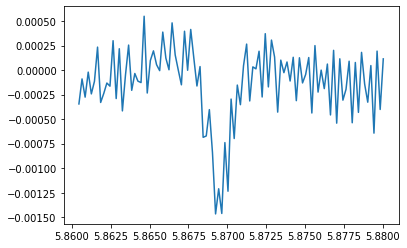

In [11]:
index_max = der_IQ(x, I_mean, Q_mean, begin = 50, end = 150, plot = True)

In [20]:
x[index_max]

5.86925

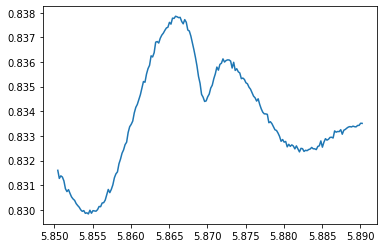

In [21]:
plt.plot(x, np.arctan((np.array(Q_mean)-1)/(np.array(I_mean)-1)))